In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,company_name,job_place,job_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,"Senior Data Scientist (Palo Alto, CA or Remote...",$60K-$105K (Glassdoor est.),The Opportunity\r\n\r\nEversight is the recogn...,4.2,Eversight\r\n4.2,Remote,51 to 200 Employees,2013,Company - Private,Enterprise Software & Network Solutions,...,82.5,Eversight\r\n,Remote,NaN,7,1,1,0,0,0
1,Claims Data Scientist,$60K-$105K (Glassdoor est.),About ConcertAI\r\n\r\nConcertAI is the leadin...,3.4,ConcertAI\r\n3.4,Remote,501 to 1000 Employees,2018,Company - Private,Biotech & Pharmaceuticals,...,82.5,ConcertAI\r\n,Remote,NaN,2,1,1,1,0,0
2,Data Scientist,$60K-$105K (Glassdoor est.),Why Should You Join First Advantage?\r\n\r\nFi...,3.5,First Advantage Corporation\r\n3.5,Remote,1001 to 5000 Employees,2003,Company - Private,Staffing & Outsourcing,...,82.5,First Advantage Corporation\r\n,Remote,NaN,17,1,1,0,0,0
3,Data Scientist - Medicare Advantage Generalist,$60K-$105K (Glassdoor est.),A bit about us:\r\n\r\nWe’re on a mission to c...,4.3,Devoted Health\r\n4.3,Remote,201 to 500 Employees,2017,Company - Private,Health Care Services & Hospitals,...,82.5,Devoted Health\r\n,Remote,NaN,3,0,1,0,0,0
4,Data Scientist - Medicare Advantage Generalist,$112K-$176K (Glassdoor est.),A bit about us:\r\n\r\nWe’re on a mission to c...,4.3,Devoted Health\r\n4.3,Remote,201 to 500 Employees,2017,Company - Private,Health Care Services & Hospitals,...,144.0,Devoted Health\r\n,Remote,NaN,3,0,1,0,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_name', 'job_place', 'job_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.value_counts()

Job Title                                                            Salary Estimate              Job Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
df.job_simp.value_counts()

data scientist    488
analyst           168
na                161
data engineer     100
mle                42
manager            21
director           14
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        781
senior    213
Name: seniority, dtype: int64

In [11]:
df.job_state.value_counts()

CA    203
VA    100
MA     93
MD     64
TX     53
NY     49
IL     35
FL     30
NJ     29
WA     28
PA     24
DC     22
CO     21
MO     20
GA     18
WI     17
NC     14
OH     13
US     12
CT     11
TN     11
IN     11
UT     10
AL      9
MI      8
MN      7
OR      7
AZ      6
SC      5
NE      4
KY      4
RI      4
MS      4
NM      3
IA      3
KS      3
DE      2
WV      1
NV      1
OK      1
VT      1
Name: job_state, dtype: int64

In [12]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4109
1      3705
2      3653
3      3428
4      3428
       ... 
989    5054
990    4949
991    4463
992    4463
993    4463
Name: desc_len, Length: 994, dtype: int64

In [13]:
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,60,105
1,0,60,105
2,0,60,105
3,0,60,105
4,0,112,176
...,...,...,...
989,0,81,132
990,0,83,143
991,0,66,111
992,0,66,111


In [14]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [15]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
315,1,34,46
638,1,40,66
639,1,40,64


In [16]:
df['company_name'] = df.company_name.apply(lambda x: x.replace('\r', ''))

In [17]:
df['company_name']

0                        Eversight\n
1                        ConcertAI\n
2      First Advantage Corporation\n
3                   Devoted Health\n
4                   Devoted Health\n
                   ...              
989                McLeod Software\n
990                CGI Group, Inc.\n
991                       Dynetics\n
992                       Dynetics\n
993                       Dynetics\n
Name: company_name, Length: 994, dtype: object

In [18]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0,994.000000,994.000000,994.000000,994.000000
mean,3.548089,1647.452716,0.003018,75.419517,126.411469,100.842555,30.800805,0.636821,1.0,0.217304,0.263581,0.515091,3961.416499
std,1.319519,744.731004,0.054882,21.178331,32.689123,26.827375,39.784295,0.481158,0.0,0.412619,0.440797,0.500024,1569.773026
min,-1.000000,-1.000000,0.000000,27.000000,46.000000,20.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,483.000000
25%,3.400000,1925.000000,0.000000,60.000000,105.000000,84.000000,6.000000,0.000000,1.0,0.000000,0.000000,0.000000,2932.000000
50%,3.800000,1991.000000,0.000000,72.000000,117.000000,95.500000,17.000000,1.000000,1.0,0.000000,0.000000,1.000000,3810.000000
75%,4.200000,2007.000000,0.000000,86.000000,151.000000,115.500000,40.000000,1.000000,1.0,0.000000,1.000000,1.000000,4885.750000
max,5.000000,2019.000000,1.000000,127.000000,218.000000,166.000000,352.000000,1.000000,1.0,1.000000,1.000000,1.000000,12328.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_name', 'job_place', 'job_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

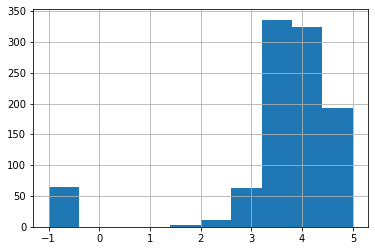

In [20]:
df.Rating.hist()

<AxesSubplot:>

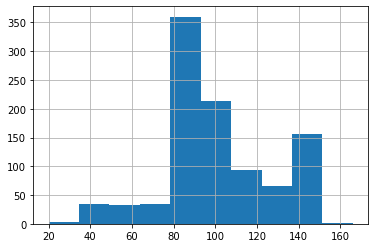

In [21]:
df.avg_salary.hist()

<AxesSubplot:>

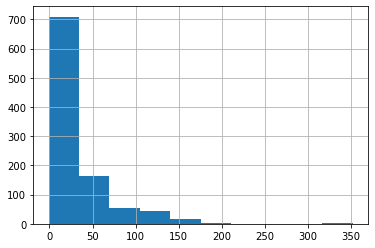

In [22]:
df.age.hist()

In [23]:
df['desc_len']

0      4109
1      3705
2      3653
3      3428
4      3428
       ... 
989    5054
990    4949
991    4463
992    4463
993    4463
Name: desc_len, Length: 994, dtype: int64

<AxesSubplot:>

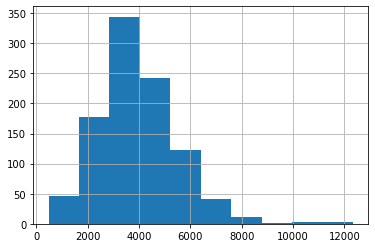

In [24]:
df.desc_len.hist()

<AxesSubplot:>

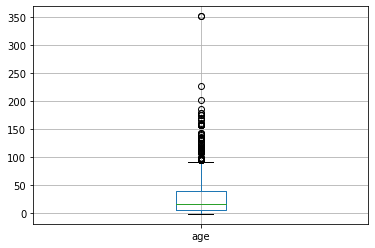

In [25]:
df.boxplot(column='age')

<AxesSubplot:>

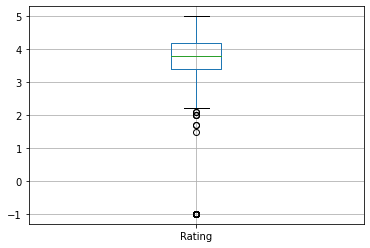

In [26]:
df.boxplot(column='Rating')

In [27]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.026884,0.119754,0.122804
avg_salary,0.026884,1.000000,0.042986,0.016130
Rating,0.119754,0.042986,1.000000,-0.050049
desc_len,0.122804,0.016130,-0.050049,1.000000


In [28]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

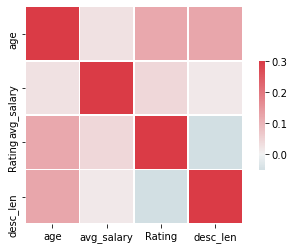

In [29]:
sns.heatmap(df[['age','avg_salary','Rating','desc_len',]].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_name', 'job_place', 'job_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [31]:
df_cat = df[['Location','Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'job_state', 'python_yn', 'rstudio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 274


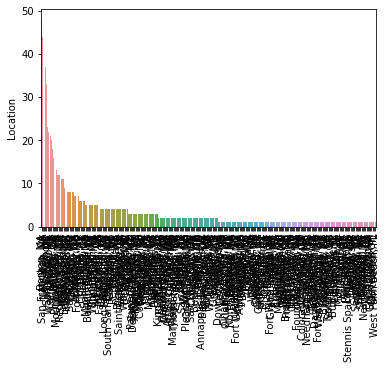

graph for Size: total = 9


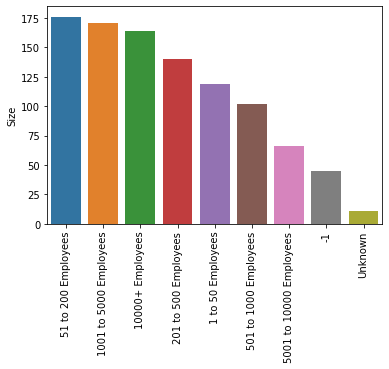

graph for Type of ownership: total = 12


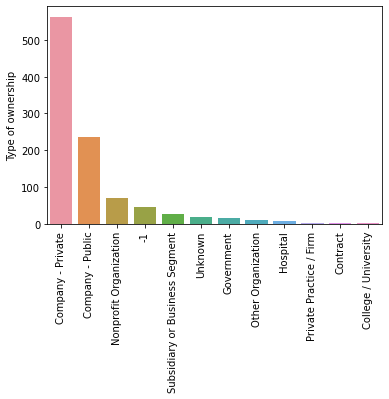

graph for Industry: total = 68


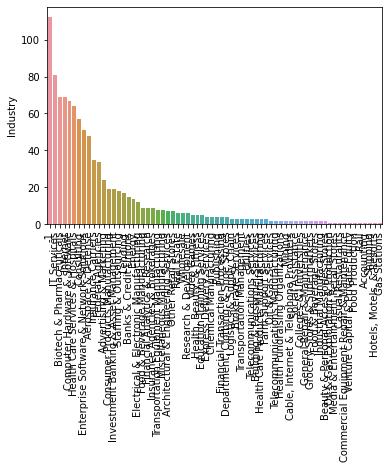

graph for Sector: total = 25


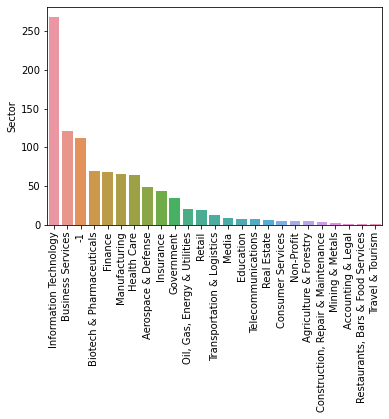

graph for Revenue: total = 14


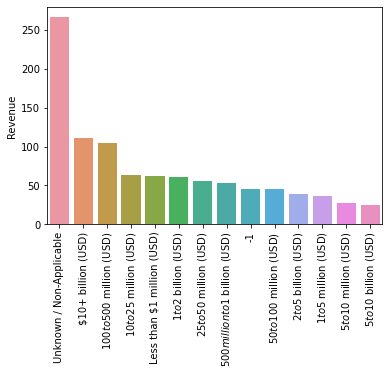

graph for company_name: total = 560


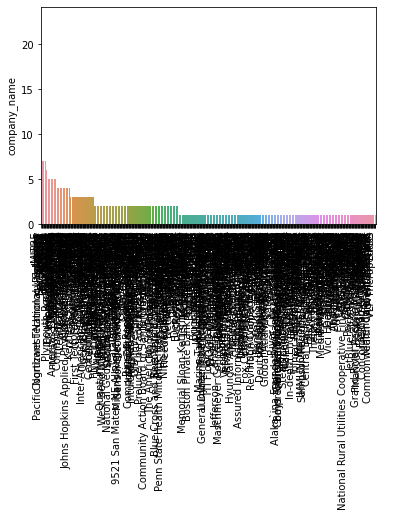

graph for job_state: total = 41


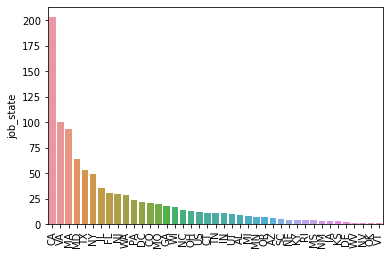

graph for python_yn: total = 2


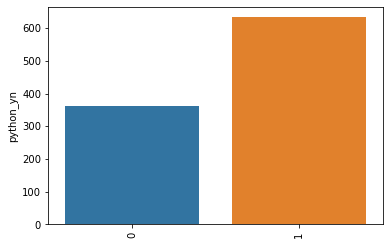

graph for rstudio_yn: total = 1


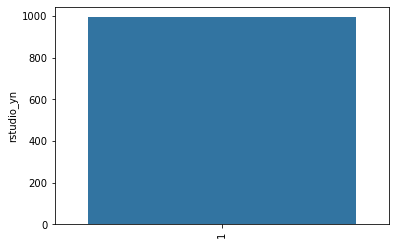

graph for spark_yn: total = 2


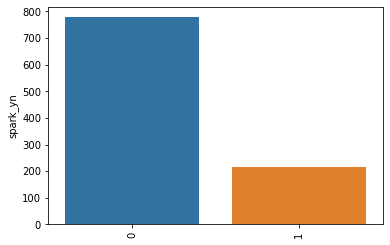

graph for aws_yn: total = 2


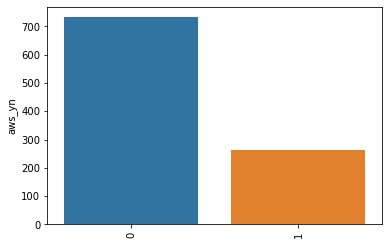

graph for excel_yn: total = 2


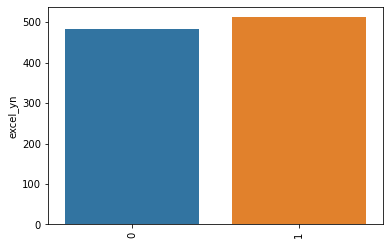

graph for job_simp: total = 7


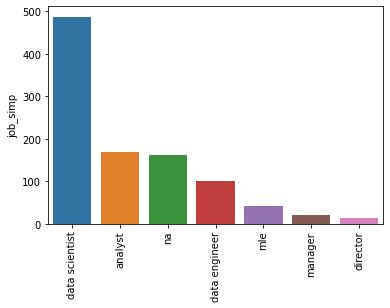

graph for seniority: total = 2


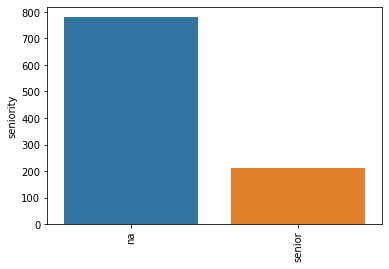

In [32]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


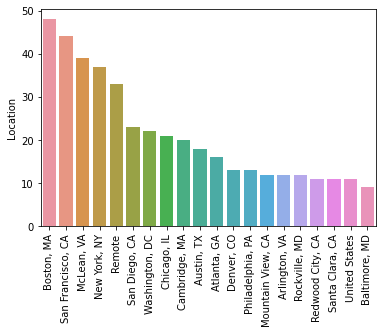

graph for company_name: total = 20


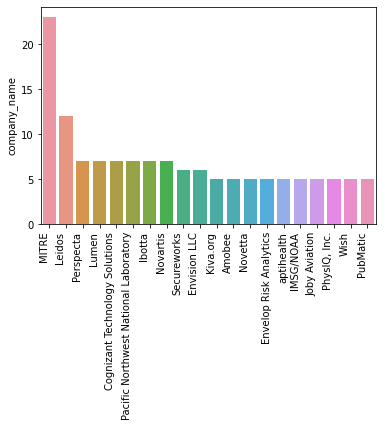

graph for job_simp: total = 7


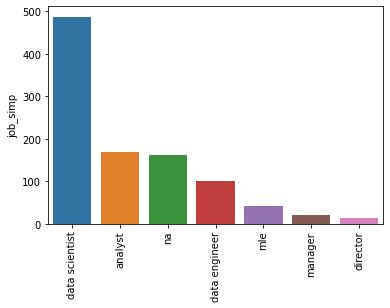

In [33]:
for i in df_cat[['Location','company_name','job_simp']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,96.431548
data engineer,97.185000
data scientist,104.463115
director,97.357143
manager,103.285714
mle,97.250000
na,97.664596


In [35]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          93.371795
               senior     103.450980
data engineer  na          98.164634
               senior      92.722222
data scientist na         104.816986
               senior     102.350000
director       na         107.687500
               senior      83.583333
manager        na         107.343750
               senior      90.300000
mle            na          91.517241
               senior     110.038462
na             na          97.072072
               senior      98.980000

In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_name', 'job_place', 'job_state', 'age',
       'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [37]:
pd.pivot_table(df, index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending =False)

,avg_salary
job_state,
OK,144.000000
SC,115.000000
CT,111.818182
MN,111.357143
NM,110.166667
MA,108.731183
IA,108.333333
US,108.083333
TN,107.318182


In [38]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [39]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending =False)

,,avg_salary
job_state,job_simp,
OK,analyst,144.000000
US,analyst,144.000000
CT,analyst,144.000000
US,na,141.750000
MA,manager,141.666667
NE,data scientist,141.000000
MI,data engineer,139.500000
CT,na,139.500000
MN,manager,137.000000


In [40]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WV        data scientist           1
WI        na                       3
          manager                  3
          data scientist           2
          data engineer            3
          analyst                  6
WA        na                       2
          data scientist          22
          analyst                  4
VT        analyst                  1
VA        manager                  1
          data engineer           20
          data scientist          49
          analyst                 13
          mle                     11
          na                       6
UT        data scientist           3
          data engineer            1
          analyst                  6
US        data scientist           4
          analyst                  1
          data engineer            4
          mle                      1
          na                       2
TX        mle                      2
          manager                  2
          data scientist          27
          data engineer           14
          analyst                  8
TN        data scientist           6
          data engineer            3
          analyst                  2
SC        na                       4
          analyst                  1
RI        analyst                  4
PA        na                       4
          data scientist          13
          analyst                  7
OR        data scientist           1
          analyst                  6
OK        analyst                  1
OH        na                       3
          director                 1
          data scientist           6
          data engineer            1
          analyst                  2
NY        analyst                 10
          data scientist          28
          data engineer            5
          mle                      3
          na                       3
NV        na                       1
NM        na                       3
NJ        director                 4
          analyst                  2
          data engineer            1
          data scientist          13
          manager                  4
          mle                      1
          na                       4
NE        na                       1
          data scientist           1
          analyst                  2
NC        na                       1
          data scientist           8
          analyst                  5
MS        data scientist           2
          analyst                  2
MO        na                       3
          data scientist           9
          data engineer            4
          analyst                  4
MN        manager                  2
          data scientist           1
          analyst                  4
MI        mle                      2
          data scientist           4
          data engineer            1
          na                       1
MD        na                      26
          mle                      1
          data scientist          25
          data engineer            8
          analyst                  4
MA        data scientist          48
          analyst                 12
          data engineer            5
          manager                  3
          na                      14
          director                 5
          mle                      6
KY        data scientist           3
          analyst                  1
KS        manager                  1
          data scientist           1
          analyst                  1
IN        na                       6
          data scientist           4
          analyst                  1
IL        data scientist          15
          data engineer            3
          analyst                  5
          manager                  2
          na                      10
IA        analyst                  2
          data engineer            1
GA        data scientist      

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NE,141.000000
OR,134.500000
UT,120.833333
MS,117.250000
AZ,114.250000
AL,113.000000
MA,112.250000
IL,111.466667
MD,110.060000


In [42]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [43]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4    118.750000
 4.8    115.500000
 3.1    111.093750
 3.9    108.098039
 3.7    104.773256
 3.5    104.385417
 2.1    104.250000
 2.2    103.500000
 4.0    103.087302
 4.7    102.982759
 5.0    102.790698
 3.8    102.187500
 4.6    101.566667
 4.2    101.488372
 3.3    100.565217
 4.1    100.293333
 2.8     99.875000
 3.4     99.792208
 2.9     99.625000
 1.7     98.500000
 4.5     97.863636
 3.2     97.709302
 4.3     97.303571
-1.0     96.984375
 3.6     96.584746
 2.7     95.500000
 2.0     94.833333
 4.4     93.214286
 3.0     91.906250
 4.9     88.125000
 2.3     87.500000
 2.6     84.571429
 1.5     84.000000
Industry
                                           avg_salary
Industry                                             
Oil & Gas Exploration & Production         144.000000
Rail                                       144.000000
Accounting                                 141.000000
Shipping                                   141.00

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [44]:
pd.pivot_table(df_pivots, index= 'Revenue', columns='python_yn', values= 'avg_salary', aggfunc='count')



python_yn,0,1
Revenue,,
$1 to $2 billion (USD),20,41
$1 to $5 million (USD),13,23
$10 to $25 million (USD),30,33
$10+ billion (USD),27,84
$100 to $500 million (USD),38,67
$2 to $5 billion (USD),16,23
$25 to $50 million (USD),18,38
$5 to $10 billion (USD),7,18
$5 to $10 million (USD),8,19


In [45]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [47]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered




In [48]:
words_filtered = punctuation_stop(words)

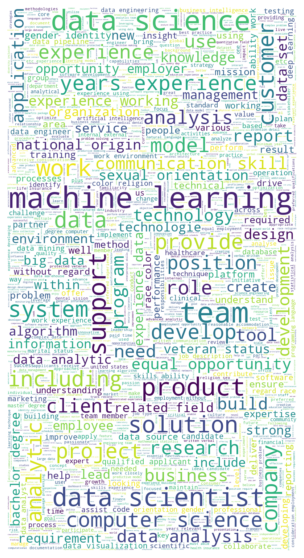

In [49]:
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()